##### Importar as bibliotecas

In [3]:
import pandas as pd                     # LER E MANIPULAR ARQUIVOS DISTINTOS
import os                               # GERENCIAR O SISTEMA OPERACIONAL
import matplotlib.pyplot as plt         # VISUALIZAR DADOS DE FORMA GRÁFICA
import seaborn as sns                   # VISUALIZAR DADOS DE FORMA GRÁFICA

######################## CARREGAR OS ARQUIVOS DE VENDAS ###############################


# PASTA QUE CONTÉM TODOS OS ARQUIVOS
caminhoDaPasta = './arquivos/vendas/'

######## AGRUPAR TODOS OS DOCUMENTOS EM UM ÚNICO DATAFRAME ############

diretorios = []         # Lista Vazia

# LOCALIZAR OS ARQUIVOS E COMBINAR COM O CAMINHO DA PASTA
for file in os.listdir(caminhoDaPasta):
    if file.endswith('.xlsx'):
        fullPath = caminhoDaPasta + file
        diretorios.append(fullPath)
    
# CRIAR UM DATAFRAME VAZIO
dfVendas = pd.DataFrame()

# LOOP PARA ACESSAR OS DOCUMENTOS E COMBINÁ-LOS (+/- UNION DO SQL)

for path in diretorios:
    df = pd.read_excel(path)
    dfVendas = pd.concat([dfVendas,df])
    
# GERAR UM ARQUIVO CSV COM OS DADOS CONSOLIDADOS
dfVendas.to_csv(caminhoDaPasta + 'arquivoCombinado.csv')



######################## CARREGAR OS DEMAIS DATAFRAMES ###################################

dfMetas = pd.read_excel('./arquivos/base-meta-new.xlsx')
dfVendedores = pd.read_excel('./arquivos/Dimensões.xlsx',sheet_name='Vendedor')
dfProdutos = pd.read_excel('./arquivos/Dimensões.xlsx',sheet_name='Produto')
dfDatas = pd.read_excel('./arquivos/Dimensões.xlsx',sheet_name='Data')
dfGrupoProduto = pd.read_excel('./arquivos/Dimensões.xlsx',sheet_name='GrupoProduto')
dfClientes = pd.read_excel('./arquivos/Dimensões.xlsx',sheet_name='Cliente')

################# TRATAMENTO DO DATAFRAME METAS ############################

# FATIAMENTO DO DATAFRAME
dfMetas = dfMetas.iloc[3:,1:4]

# RENOMEAR COLUNAS
dfMetas.columns = ['cdVendedor','data','meta']

dfMetas

# MESCLANDO AS TABELAS VENDAS E DATAS COM PD.MERGE

df_result = pd.merge(
                dfVendas[['DataEmissao','QtdItens','ValorUnitario']],
                dfDatas[['Data','Ano']],
                left_on='DataEmissao',
                right_on='Data'
            )

# ADICIONAR A COLUNA SUBTOTAL AO DATAFRAME
df_result['subtotal'] = df_result['QtdItens'] * df_result['ValorUnitario']





In [13]:
df_result

,DataEmissao,QtdItens,ValorUnitario,Data,Ano,valorTotal
0,2017-01-12,6,8.83,2017-01-12,2017,52.98
1,2017-01-12,6,4.44,2017-01-12,2017,26.64
2,2017-01-12,10,0.96,2017-01-12,2017,9.60
3,2017-01-13,6,2.92,2017-01-13,2017,17.52
4,2017-01-13,6,2.81,2017-01-13,2017,16.86
...,...,...,...,...,...,...
260091,2019-03-12,24,1.62,2019-03-12,2019,38.88
260092,2019-03-12,12,3.25,2019-03-12,2019,39.00
260093,2019-03-12,12,3.26,2019-03-12,2019,39.12
260094,2019-03-12,12,3.14,2019-03-12,2019,37.68


In [16]:
# Agrupar os dados por ano, somando a coluna valor total
df_result[['Ano', 'valorTotal',]].groupby('Ano').sum()

,valorTotal
Ano,
2017,6648222.05
2018,10214809.43
2019,1046201.01


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Gráfico barras de vendas')

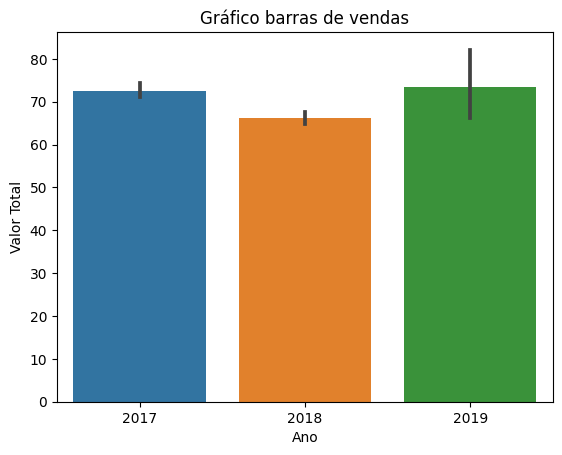

In [22]:
# Gerar um gráfico de barras para apresentar as vendas
sns.barplot(data= df_result,
             x = 'Ano', y= 'valorTotal')

plt.xlabel('Ano')
plt.ylabel('Valor Total')
plt.title('Gráfico barras de vendas')

In [25]:
dfMetas

,cdVendedor,data,meta
3,102,2017-01-01 00:00:00,140768.312981
4,102,2017-02-01 00:00:00,124258.753484
5,102,2017-03-01 00:00:00,169509.931262
6,102,2017-04-01 00:00:00,143465.231352
7,102,2017-05-01 00:00:00,98423.627768
...,...,...,...
790,669,2022-08-01 00:00:00,50216
791,669,2022-09-01 00:00:00,36746
792,669,2022-10-01 00:00:00,136380
793,669,2022-11-01 00:00:00,92726


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Gráfico barras de metas')

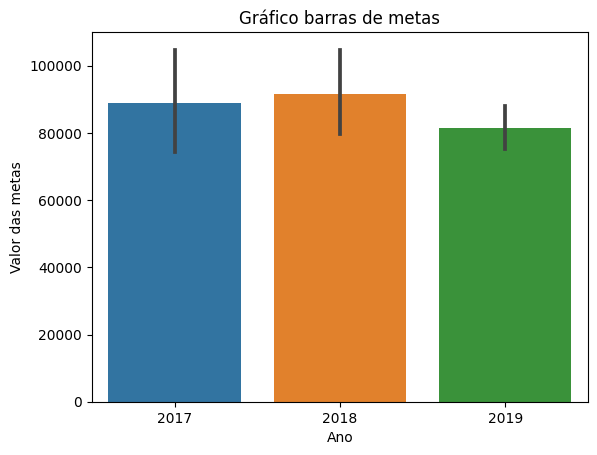

In [41]:
# Converter um tipo de dado da coluna data da tabela de metas
dfMetas['data'] = dfMetas['data'].astype('datetime64[ns]')

# Converter o tipo de dado da coluna meta da tabela de metas
dfMetas['meta'] = dfMetas['meta'].astype('float')

df_result = pd.merge(
    dfMetas[['data','meta']],
    dfDatas[['Data','Ano']],
    left_on= 'data',
    right_on='Data'
)

df_result[['Ano','meta']].groupby('Ano').sum().reset_index()

sns.barplot(data= df_result,
             x = 'Ano', y= 'meta')

plt.xlabel('Ano')
plt.ylabel('Valor das metas')
plt.title('Gráfico barras de metas')

In [57]:
# Filtrando os dados de 2018
df_result = dfVendas[(dfVendas['DataEmissao']>='2018-01-01')&(dfVendas['DataEmissao']<='2018-12-31')]
df_result

# Mesclar os dados(join)
df_result = pd.merge(
        df_result[['DataEmissao','QtdItens']],
        dfDatas[['Data','Mes','MesNum']],
        left_on='DataEmissao',
        right_on='Data'
)

df_result = df_result[['Mes','MesNum','QtdItens',]].groupby(['Mes', 'MesNum']).sum().sort_values(by='MesNum').reset_index()

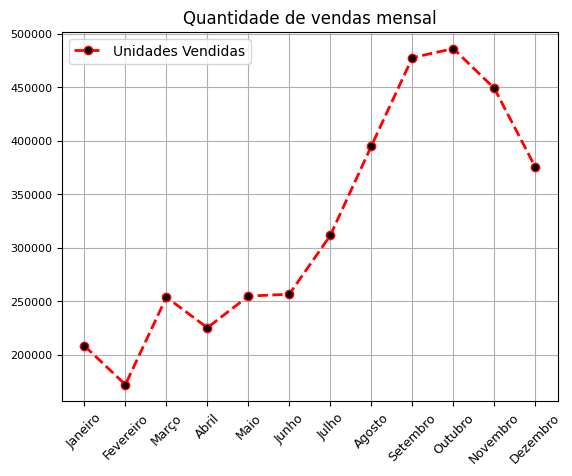

In [75]:
# Criar um gráfico de linhas para apresentar as informações

mes = df_result['Mes'].to_list()
itens= df_result['QtdItens'].to_list()

plt.plot(
    mes,
    itens,
    label = 'Unidades Vendidas',
    c = 'red',
    marker = 'o',
    markerfacecolor = 'k',
    ls = '--',
    linewidth = 2
)

# Alterar os rótulos dos eixos
plt.xticks(fontsize= 9, rotation= 45)
plt.yticks(fontsize= 8)

# Adicionar legenda ao gráfico
plt.grid()

# Adicionar grades no gráfico
plt.legend()

plt.title('Quantidade de vendas mensal')

plt.savefig('./arquivos/qtd vendas 2018.png')